Nama  : Ainur Rohman

Email : ainur.solver@gmail.com

# Data Collecting

In [1]:
# Menginstall kaggle : Berfungsi memudahkan dalam mengorganisi package dataset dari kaggle
!pip install -q kaggle

In [2]:
# Code ini berfungsi untuk mengupload API kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ainurrohman","key":"4fb0f5551dc0f7d0b214aeb6b2fc9515"}'}

In [3]:
! mkdir -p ~/.kaggle              # Membuat direktori kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json # Untuk memberikan akses terbatas

In [4]:
! kaggle --version

Kaggle API 1.5.4


In [5]:
# Mendownload dataset  "cuaca kota delhi"
!kaggle datasets download -d mahirkukreja/delhi-weather-data

  0% 0.00/1.00M [00:00<?, ?B/s]
100% 1.00M/1.00M [00:00<00:00, 67.3MB/s]


In [6]:
# Membuat direktori bbc news
!mkdir delhi-weather-data

In [7]:
# Mengekstrak fil zip
!unzip delhi-weather-data.zip -d delhi-weather-data
!ls delhi-weather-data

Archive:  delhi-weather-data.zip
  inflating: delhi-weather-data/testset.csv  
testset.csv


# Data Preprocessing

In [8]:
# Import library yang digunakan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf

## Membaca Dataset hasil unzip

## Processing menggunakan library pandas

In [9]:
# Memuat dataset

data_weather = pd.read_csv('delhi-weather-data/testset.csv')

In [10]:
# Menampilkan 5 data teratas

data_weather.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [11]:
# Menampilkan 5 data terbawah

data_weather.tail()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
100985,20170424-06:00,Haze,17.0,0,0,NaN,25.0,NaN,1005.0,0,0,34.0,0,0,4.0,320.0,NW,NaN,NaN,11.1
100986,20170424-09:00,Haze,14.0,0,0,NaN,16.0,NaN,1003.0,0,0,38.0,0,0,4.0,320.0,NW,NaN,NaN,22.2
100987,20170424-12:00,Haze,12.0,0,0,NaN,14.0,NaN,1002.0,0,0,36.0,0,0,4.0,270.0,West,NaN,NaN,18.5
100988,20170424-15:00,Haze,15.0,0,0,NaN,27.0,NaN,1004.0,0,0,32.0,0,0,2.0,320.0,NW,NaN,NaN,3.7
100989,20170424-18:00,Haze,15.0,0,0,NaN,30.0,NaN,1005.0,0,0,30.0,0,0,2.0,320.0,NW,NaN,NaN,3.7


In [12]:
# Mengecek tipe data apa saja yang terdapat dalam dataset

data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

## Menghitung jumlah/total banyaknya sample pada dataset

In [13]:
data_weather.info

<bound method DataFrame.info of           datetime_utc  _conds   _dewptm  ...   _wgustm   _windchillm   _wspdm
0       19961101-11:00   Smoke       9.0  ...       NaN           NaN      7.4
1       19961101-12:00   Smoke      10.0  ...       NaN           NaN      NaN
2       19961101-13:00   Smoke      11.0  ...       NaN           NaN      NaN
3       19961101-14:00   Smoke      10.0  ...       NaN           NaN      NaN
4       19961101-16:00   Smoke      11.0  ...       NaN           NaN      0.0
...                ...     ...       ...  ...       ...           ...      ...
100985  20170424-06:00    Haze      17.0  ...       NaN           NaN     11.1
100986  20170424-09:00    Haze      14.0  ...       NaN           NaN     22.2
100987  20170424-12:00    Haze      12.0  ...       NaN           NaN     18.5
100988  20170424-15:00    Haze      15.0  ...       NaN           NaN      3.7
100989  20170424-18:00    Haze      15.0  ...       NaN           NaN      3.7

[100990 rows x 20 c

**Dataset yang digunakan memiliki 100990 sample**

In [14]:
# Untuk mengecek data null
data_weather.isnull().sum()

datetime_utc         0
 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64

In [15]:
data_weather['datetime_utc']=pd.to_datetime(data_weather['datetime_utc'])
data_weather['datetime_utc'].head()
data_weather[' _tempm'].fillna(data_weather[' _tempm'].mean(), inplace=True)
data_weather = data_weather[['datetime_utc',' _tempm' ]]
data_weather.head()

,datetime_utc,_tempm
0,1996-11-01 11:00:00,30.0
1,1996-11-01 12:00:00,28.0
2,1996-11-01 13:00:00,24.0
3,1996-11-01 14:00:00,24.0
4,1996-11-01 16:00:00,23.0


In [16]:
# mengecek informasi baru

data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   datetime_utc  100990 non-null  datetime64[ns]
 1    _tempm       100990 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 MB


Mengubah nama variabel

In [17]:
Date = data_weather['datetime_utc'].values
Temp  = data_weather[' _tempm'].values

Plotting Data

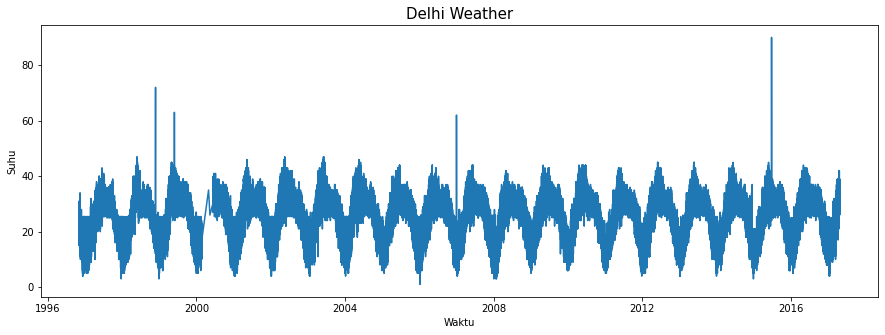

In [19]:
plt.figure(figsize=(15,5))
plt.plot(Date, Temp)
plt.title('Delhi Weather',
              fontsize=15);
plt.xlabel('Waktu')
plt.ylabel('Suhu')
plt.show()

# Membagi dataset sebanyak 20 %

In [20]:
x_train, x_test, y_train, y_test = train_test_split(Temp, Date, test_size = 0.2, random_state = 42)
print(len(x_train), len(x_test))

80792 20198


Setelah dilakukan splitting data, diperoleh:

Data train = 80792

Data test = 20198

Melakukan Preprocessing data dengan Min Max Scaller

In [23]:
minimum = min(x_train)
maximum = max(x_train)
print(minimum,maximum)
mae = (maximum - minimum) / 10
print(mae)

1.0 90.0
8.9


## Mengubah dalam bentuk numpy

In [24]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [25]:
data_x_train = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=1000)
data_x_test = windowed_dataset(x_test, window_size=60, batch_size=100, shuffle_buffer=1000)

# Membuat Arsitektur dengan LSTM dan Menggunakan Model Sequential

In [26]:
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)  
])

## Menggunakan Fungsi Callback

Callback Function berfungsi untuk memberi tahu model kita untuk berhenti ketika telah mencapai akurasi tertentu, sehingga proses pelatihan model menjadi lebih singkat dan untuk efisiensi waktu pelatihan.

In [28]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if(logs.get('mae') < mae):
        print("\nMAE sudah < 10 % skala data")
        self.model.stop_training = True
callbacks = myCallback()

#Menggunakan optimizer

In [29]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),            # Loss function yang dapat dicoba untuk ini adalah Huber yang merupakan salah satu loss function yang umum digunakan pada kasus time series
              optimizer=optimizer,
              metrics=["mae"])                         # metrik evaluasi dengan mean absolute error (mae)

# Pelatihan

In [30]:
num_epochs=100
history = model.fit(data_x_train, callbacks=[callbacks], validation_data=data_x_test, epochs=num_epochs)

Epoch 1/100
808/808 [==============================] - 100s 118ms/step - loss: 15.0065 - mae: 15.4978 - val_loss: 6.4505 - val_mae: 6.9316
Epoch 2/100
808/808 [==============================] - 94s 116ms/step - loss: 6.3896 - mae: 6.8712 - val_loss: 6.4502 - val_mae: 6.9317

MAE sudah < 10 %


Waktu pelatihan adalah 2 menit 55 detik dan mae < 10 % skala data

# Membuat Plot Grafik Hasil

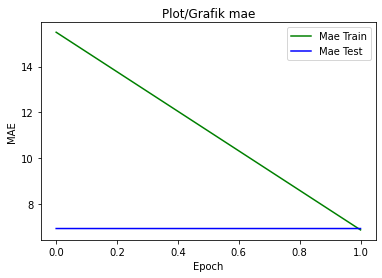

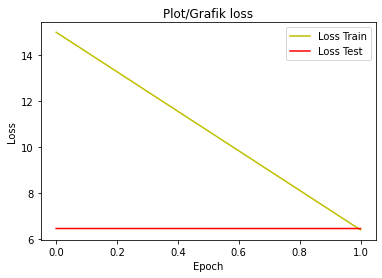

In [57]:
plt.plot(history.history['mae'], 'g')
plt.plot(history.history['val_mae'], 'b')
plt.title('Plot/Grafik mae')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Mae Train','Mae Test'], loc='upper right')
plt.show()

plt.plot(history.history['loss'], 'y')
plt.plot(history.history['val_loss'], 'r')
plt.title('Plot/Grafik loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss Train', 'Loss Test'], loc='upper right')
plt.show()